Here is an exercise that involves exploring and preprocessing a dataset using pandas, visualizing the data with matplotlib, and performing linear regression using scikit-learn.

**Problem: Predicting Car Fuel Efficiency**

The Auto MPG dataset is a classic dataset used for regression examples. The goal is to predict the fuel efficiency of a car given features like the number of cylinders, horsepower, weight, and more. You can find the dataset on the UCI Machine Learning Repository, but it's also conveniently available in seaborn.

Your tasks:

1. Load and explore the data: Use pandas to load the data and generate descriptive statistics to understand your variables. Also create some plots to visualize the distributions of your variables and the relationships between them.

2. Preprocess the data: Check for missing values and handle them appropriately. Split the data into a training set and a test set. Standardize or normalize the features if necessary.

3. Create a model: Use scikit-learn to create a linear regression model. Train the model using your training data.

4. Evaluate the model: Use metrics like MSE and R-squared to evaluate your model on your test data. Also create a scatterplot comparing actual and predicted MPG.

5. Interpret the model: What can you learn about the relationships between the features and the MPG? Do the coefficients make sense?

Let's start with the first part:

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
mpg = sns.load_dataset("mpg")

# Display the first few rows of the data
print(mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [94]:
# Generate descriptive statistics
print(mpg.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


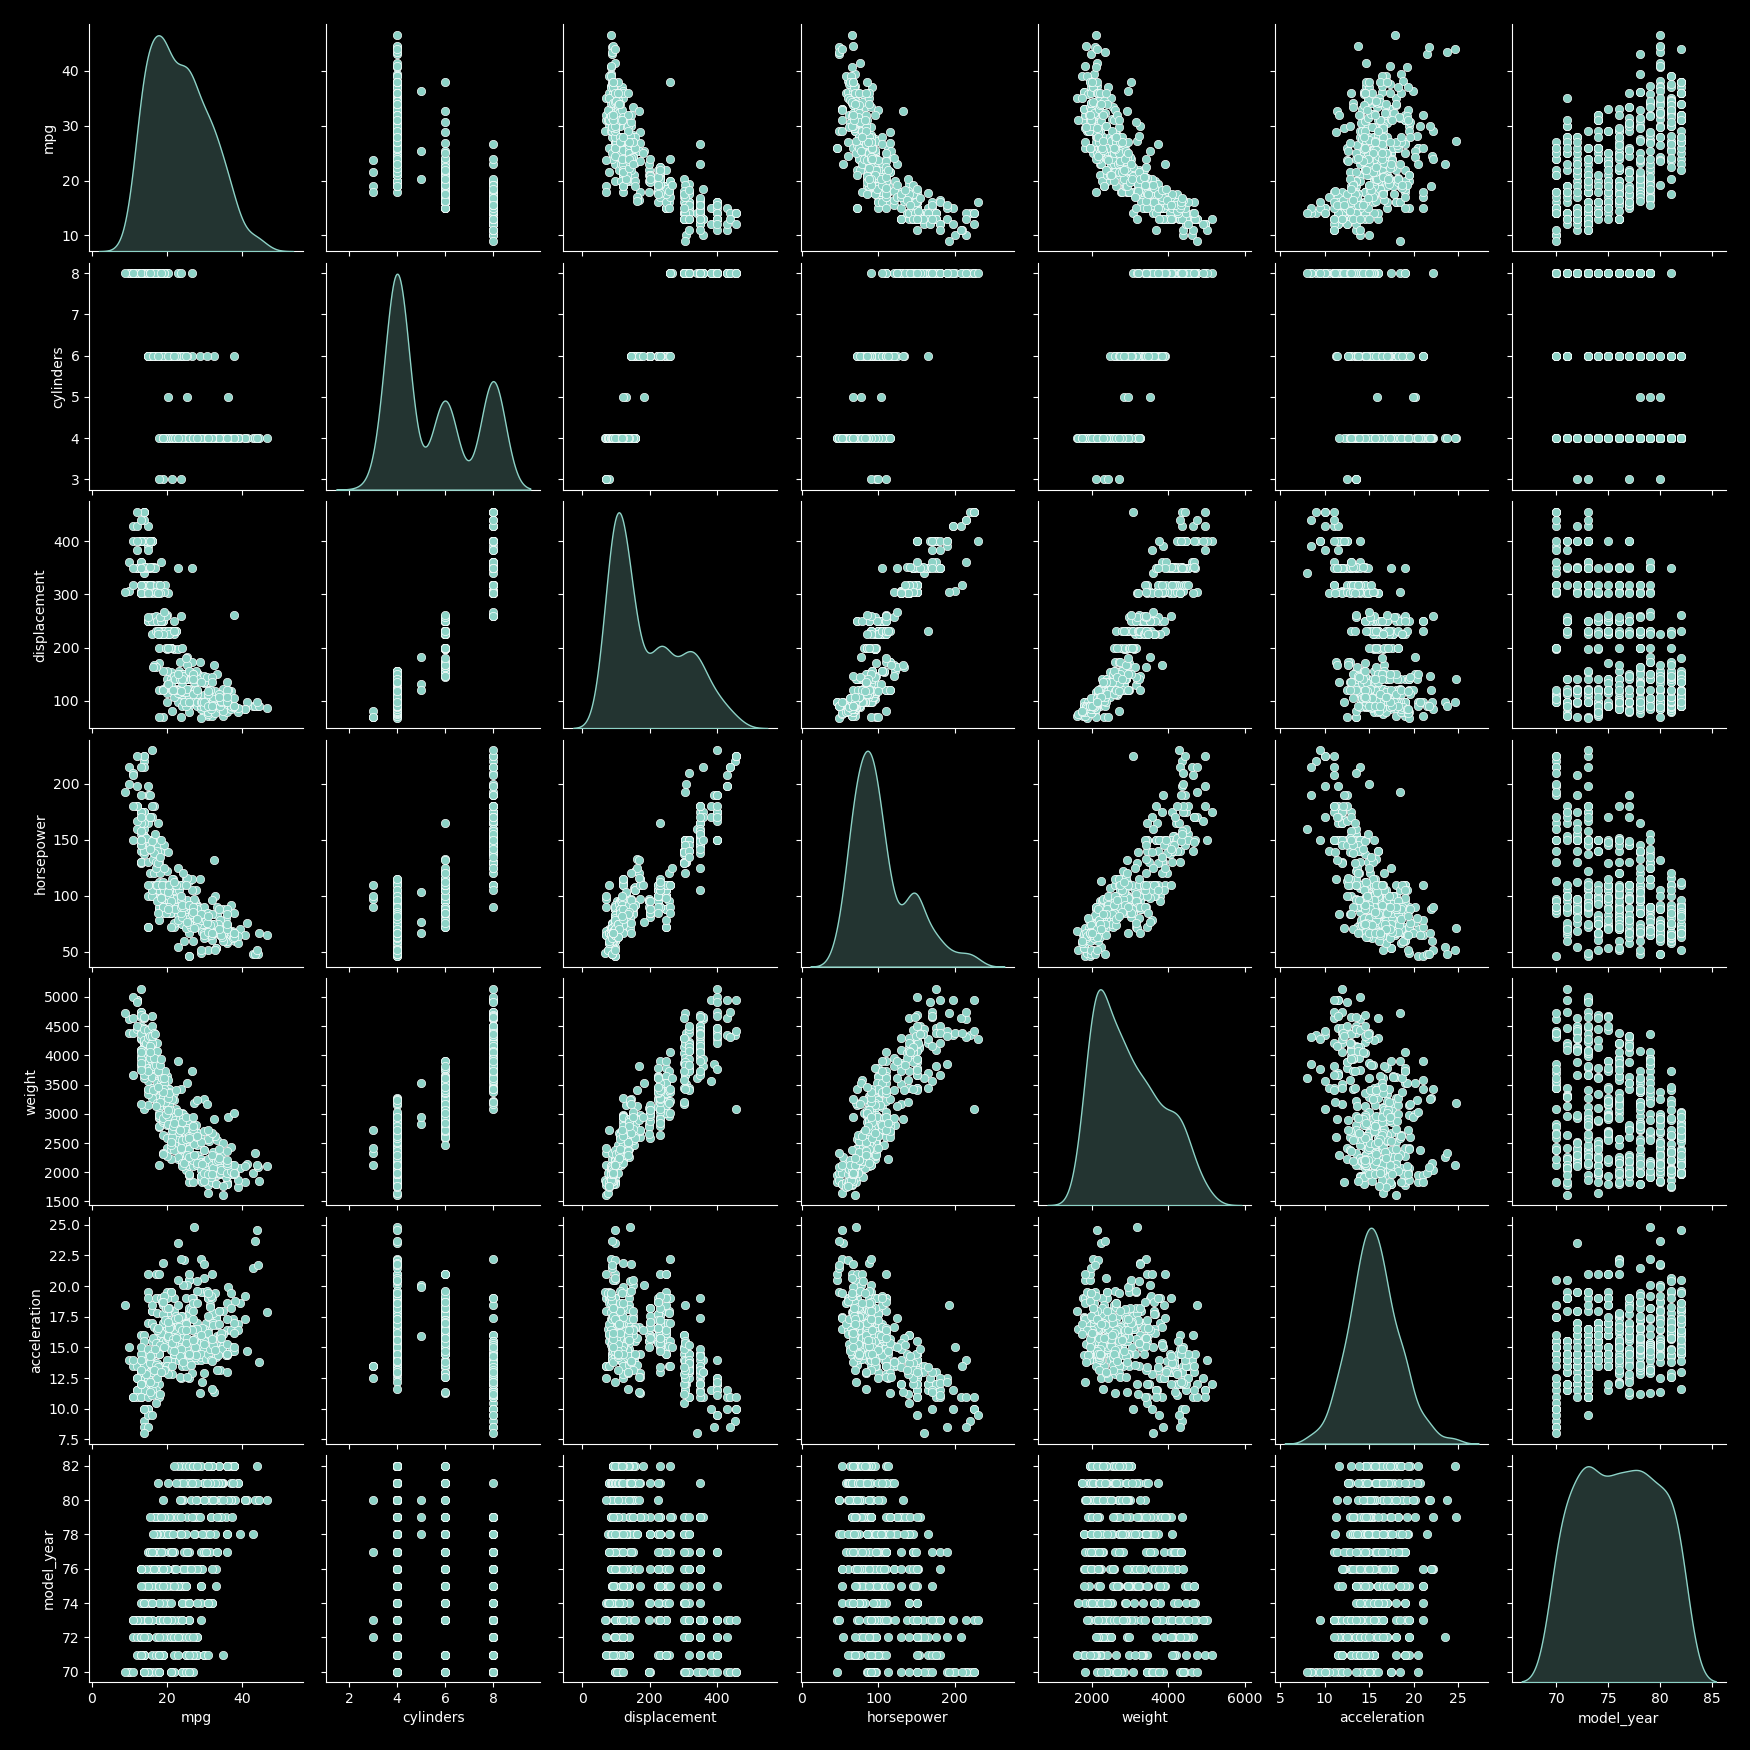

In [95]:
# Create a scatter matrix to visualize relationships between different features
sns.pairplot(mpg, diag_kind='kde')  # The diag_kind='kde' option specifies that we want to display a Kernel Density Estimate (KDE) on the diagonal. 
plt.show()

## 1. Load and explore the data

In [96]:
import pandas as pd

df = pd.DataFrame(mpg)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [97]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [98]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

Skip this - parse the string data as categories

In [99]:
df.origin.astype('category')

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: category
Categories (3, object): ['europe', 'japan', 'usa']

In [100]:
df.name.astype('category')

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: category
Categories (305, object): ['amc ambassador brougham', 'amc ambassador dpl', 'amc ambassador sst', 'amc concord', ..., 'vw pickup', 'vw rabbit', 'vw rabbit c (diesel)', 'vw rabbit custom']

In [101]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

instead I should create numeric encoding for categories:

In [102]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in mpg.columns:
    if mpg[col].dtype == 'object':
        mpg[col] = le.fit_transform(mpg[col])

In [103]:
# behold: no more strings:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,49
1,15.0,8,350.0,165.0,3693,11.5,70,2,36
2,18.0,8,318.0,150.0,3436,11.0,70,2,231
3,16.0,8,304.0,150.0,3433,12.0,70,2,14
4,17.0,8,302.0,140.0,3449,10.5,70,2,161


In [104]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int32
name              int32
dtype: object

## Visualise the data

Although the seaborn plot is much better

In [105]:
import matplotlib.pyplot as plt

plt.subplot(111)             # this could be (212) or (312) or whatever, with row, column, plot number 
plt.scatter(df['mpg'], df['weight'])
plt.title('MPG vs Weight')

C:\Users\johan\AppData\Local\Temp\ipykernel_8496\177787679.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(111)             # this could be (212) or (312) or whatever, with row, column, plot number


Text(0.5, 1.0, 'MPG vs Weight')

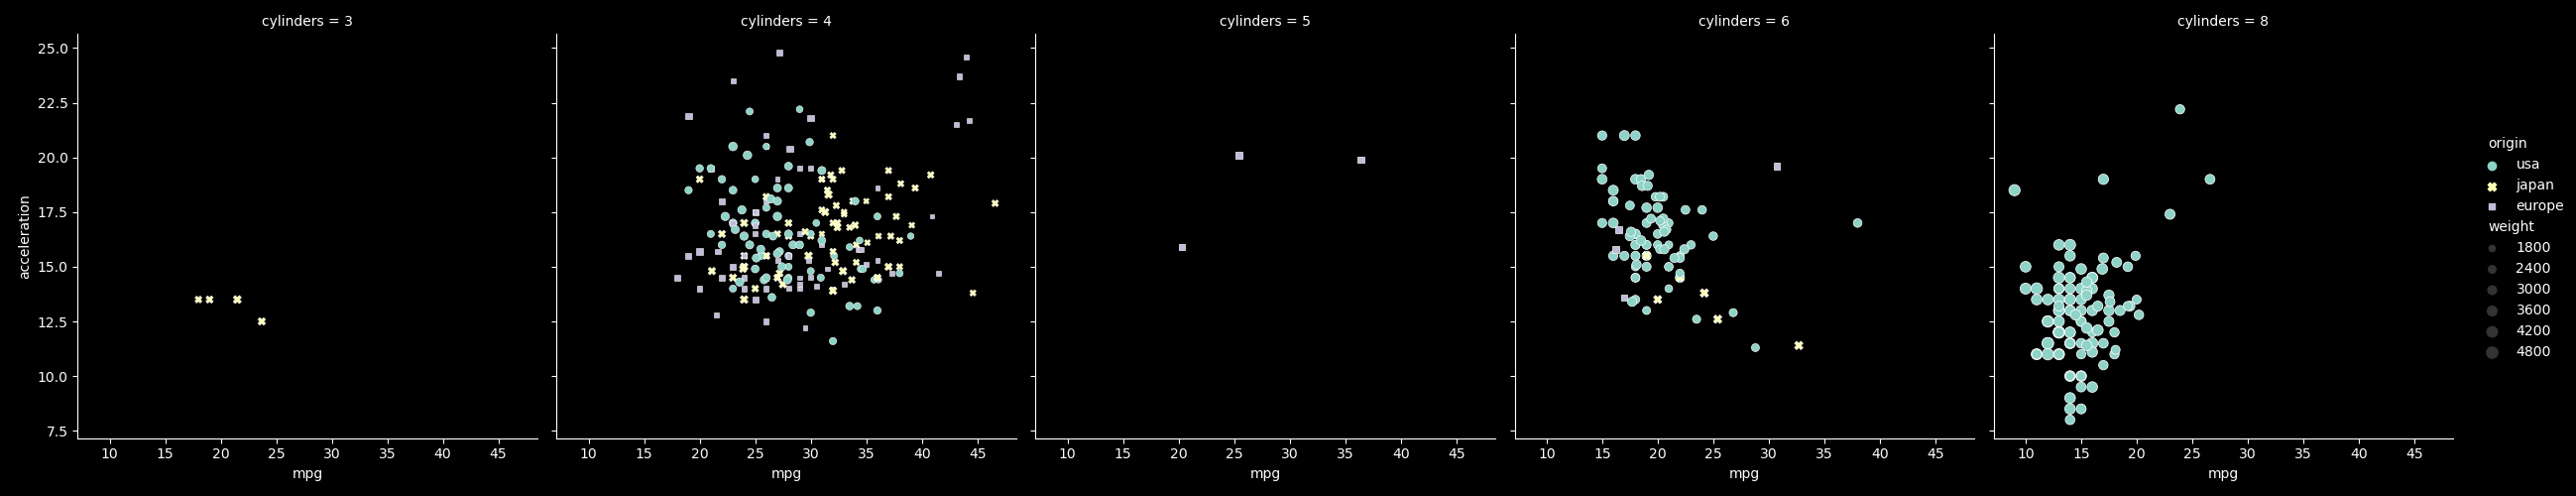

In [106]:
sns.relplot(data=df, col='cylinders', x='mpg', y='acceleration', hue='origin', style='origin', size='weight')

# 2. Preprocess the data: 

Check for missing values and handle them appropriately. 
 
Split the data into a training set and a test set. 

Standardize or normalize the features if necessary.

In [107]:
# Check for missing values
df.isnull().sum()        # this calculates the sum of all True values by column

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Note that horsepower has 6 missing values. All of these so called NaNs need to be replaced, either by the mode, or by the mean. 

In [108]:
for column in mpg.columns:
    if mpg[column].dtype == 'object':
        mpg[column] = mpg[column].fillna(mpg[column].mode()[0])
    else:
        mpg[column] = mpg[column].fillna(mpg[column].mean())

The mode is the value that appears most frequently in the column. In pandas, the mode() function returns a DataFrame because a column can technically have more than one mode. By adding [0] at the end, we select the first mode in case there are multiple.

In [109]:
df.origin.mode()

0    usa
Name: origin, dtype: object

The same can be achieved with: 

```python
mean_horsepower = mpg['horsepower'].mean()
mpg_mean_filled = mpg.copy()
mpg_mean_filled['horsepower'] = mpg_mean_filled['horsepower'].fillna(mean_horsepower)
```

So it doesn't have to iterate.

## Now for splitting and standardising

In [110]:
from sklearn.model_selection import train_test_split

# Define our features and target variable
X = mpg.drop('mpg', axis=1)  # features: all columns except 'mpg'
y = mpg['mpg']  # target: 'mpg' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% test

To standardize the features, we subtract the mean and divide by the standard deviation. This will ensure that the features have a mean of 0 and a standard deviation of 1.

We can use the StandardScaler class from the sklearn.preprocessing module to do this.

In [111]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Create a model: 

Use scikit-learn to create a linear regression model. 

Train the model using your training data.

In [113]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()  # create a model object

model.fit(X_train_scaled, y_train)  # fit the model to the training data (and learn the coefficients)

LinearRegression()

After running this code, the model object now represents a trained linear regression model. This model has been fit to the training data, meaning it has learned a relationship between the features and the target variable based on the training data.

## here's the equation

In [120]:
y_pred = model.predict(X_test_scaled)  # generate predictions on the test data

coef = model.coef_
coef.shape

(8,)

In [124]:

print(f'y = {coef[0]}x + \n{coef[1]}x + \n{coef[2]}x + \n{coef[3]}x + \n{coef[4]}x + \n{coef[5]}x + \n{coef[6]}x + \n{coef[7]}x + \n{model.intercept_}')

y = -0.10080155386042887x + 
1.613445786178291x + 
-0.21300451407168436x + 
-6.1401184839932546x + 
0.22447578651321376x + 
3.0142285510970086x + 
-1.003109073018461x + 
0.3237499314196644x + 
23.60817610062894


In [126]:
feature_names = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year','origin','name']  # replace these with your actual feature names
equation = "y = "

for i in range(len(coef)):
    equation += f'{coef[i]}*{feature_names[i]} + '

equation += f'{model.intercept_}'

print(equation)

y = -0.10080155386042887*cylinders + 1.613445786178291*displacement + -0.21300451407168436*horsepower + -6.1401184839932546*weight + 0.22447578651321376*acceleration + 3.0142285510970086*model_year + -1.003109073018461*origin + 0.3237499314196644*name + 23.60817610062894


Note: it's not really a product of the features, as they're all scaled 


The coefficients represent the effects of each feature *after scaling*. 

Each coefficient tells us how much the dependent variable is expected to increase when the corresponding feature increases by one standard deviation, while other features remain constant. 

Remember that feature scaling doesn't change the overall information the features represent, it just brings them to a comparable scale. Thus, even though the coefficients are in terms of the scaled features, they still give us valid insights about the relationships between the features and the target variable.

If you want to interpret the coefficients in the original scale of each feature, you would have to "unscale" the coefficients. To do this, you would multiply each coefficient by the standard deviation of the corresponding feature, and divide by the standard deviation of the target variable (if it was also scaled).

However, this might not be necessary for many applications, and interpreting the coefficients in the scaled space is often sufficient.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the R^2 score of the predictions
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 8.878871092793698
R^2 Score: 0.8348622212382477


MSE is a common metric for evaluating the performance of regression models. It represents the average of the squares of the differences between the actual and predicted values. A lower MSE indicates a better fit to the data.

## Simplified

I asked chatgpt to only use the two most relevant features and compare it to the model with all features.

In [66]:
# Select only the 'weight' and 'model_year' features for the input
df2 = mpg[['weight', 'model_year']]

# Split the simplified data into a training set and a test set
X_train_simplified, X_test_simplified, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=42)

# Standardize the simplified training and test data
scaler = StandardScaler()
X_train_simplified_scaled = scaler.fit_transform(X_train_simplified)
X_test_simplified_scaled = scaler.transform(X_test_simplified)

# Train a new model on the simplified training data
model_simplified = LinearRegression()
model_simplified.fit(X_train_simplified_scaled, y_train)

# Evaluate the new model
y_pred_simplified = model_simplified.predict(X_test_simplified_scaled)
mse_simplified = mean_squared_error(y_test, y_pred_simplified)
r2_simplified = r2_score(y_test, y_pred_simplified)

print('Mean Squared Error (simplified):', mse_simplified)
print('R^2 Score (simplified):', r2_simplified)

Mean Squared Error (simplified): 9.440556073999087
R^2 Score (simplified): 0.8244154640783903


In [68]:
df2.shape

(398, 2)

In [72]:
y.shape

(398,)

In [74]:
X_train_simplified.shape # this is a subsection obvly 

(318, 2)

In [76]:
X_full_scaled = scaler.fit_transform(df2, y)
X_full_scaled.shape

(398, 2)

## The simplified model can also be plotted:

- note that the chatgpt model didn't use the scaled data, so the coefficients are different
- also the y intercept had been left out, so the scatter() only scattered in two dimensions
- the full set of `y` had a length of 398 instead of 318 however, so i had to chop off some datapoints 

In [64]:
df2 = pd.DataFrame(X_train_simplified_scaled, y[:318])
df2.head()

,0,1
mpg,,
18.0,0.552826,-1.696667
15.0,-0.999667,-1.696667
18.0,-1.124772,1.638975
16.0,-1.392854,0.527094
17.0,-0.327675,-0.306816


In [78]:
df2 = pd.DataFrame(X_full_scaled, y)
df2.shape

(398, 2)

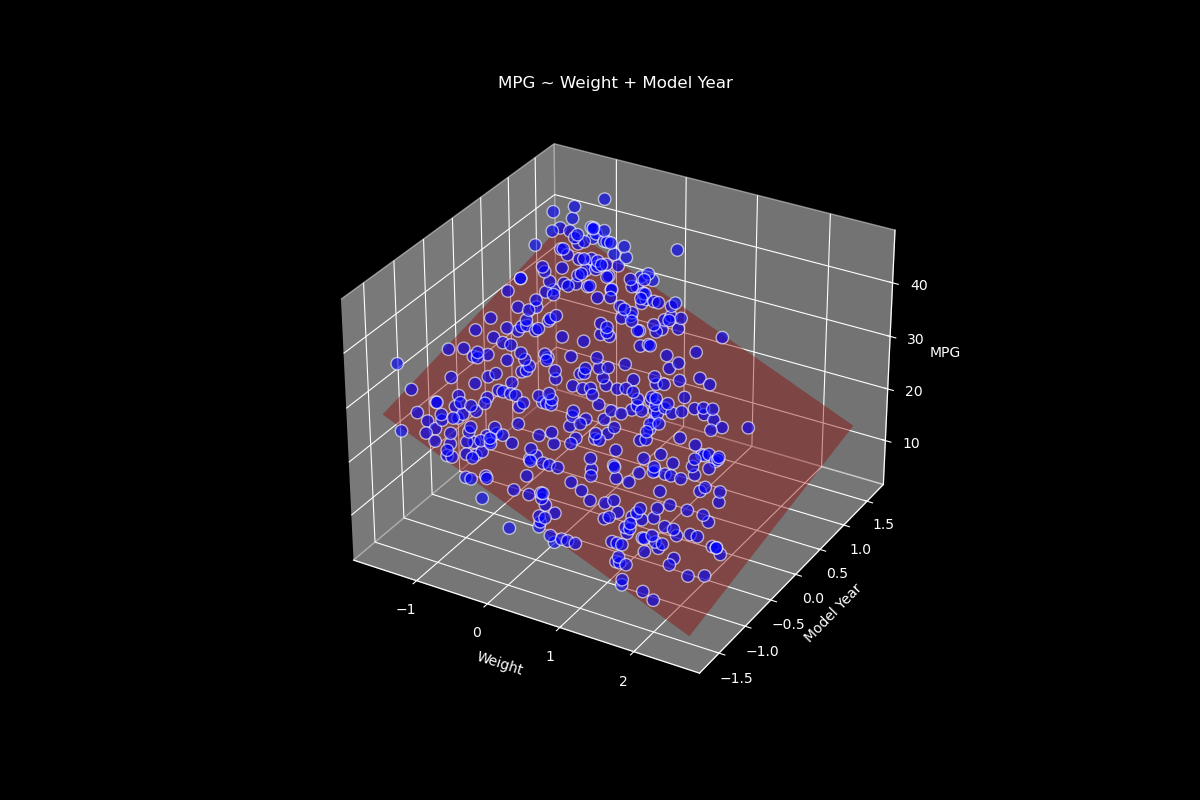

AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

In [79]:
import numpy as np

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate coordinates for hyperplane
weight_seq = np.linspace(df2[0].min(), df2[0].max(), num=10)
model_year_seq = np.linspace(df2[1].min(), df2[1].max(), num=10)
weight_seq, model_year_seq = np.meshgrid(weight_seq, model_year_seq)
mpg_seq = model_simplified.intercept_ + model_simplified.coef_[0]*weight_seq + model_simplified.coef_[1]*model_year_seq  # this is the function

# 3D scatterplot
ax.scatter(df2[0], df2[1], y, color='blue', alpha=0.6, edgecolors='w', s=80)
ax.plot_surface(weight_seq, model_year_seq, mpg_seq, color='red', alpha=0.4)
ax.set_xlabel('Weight')
ax.set_ylabel('Model Year')
ax.set_zlabel('MPG')
ax.set_title('MPG ~ Weight + Model Year')
plt.ion

plt.show()

To break down the mathematical formula representation for both the cases.

In the original case, where we had five features (displacement, horsepower, weight, acceleration, model_year), the linear regression model can be written as:

**y = β0 + β1*displacement + β2*horsepower + β3*weight + β4*acceleration + β5*model_year + ε**

In this equation:

- y is the target variable (mpg).
- β0 is the y-intercept.
- β1 to β5 are the coefficients for the features displacement, horsepower, weight, acceleration, and model_year respectively.
- ε is the error term, representing the difference between the actual and predicted values.

In the simplified case, where we only use two features (weight, model_year), the linear regression model can be written as:

**y = β0 + β1*weight + β2*model_year + ε**

In this equation:

- y is the target variable (mpg).
- β0 is the y-intercept.
- β1 and β2 are the coefficients for the features weight and model_year respectively.
- ε is the error term, representing the difference between the actual and predicted values.

Please note that the specific values for β0, β1, β2, etc. are determined during the model training process, and they will depend on the specific data that you use to train the model.

## how to check features for relevance 

In [82]:
import seaborn as sns

corr_matrix = df2.corr()
corr_matrix

,0,1
0,1.000000,-0.306564
1,-0.306564,1.000000


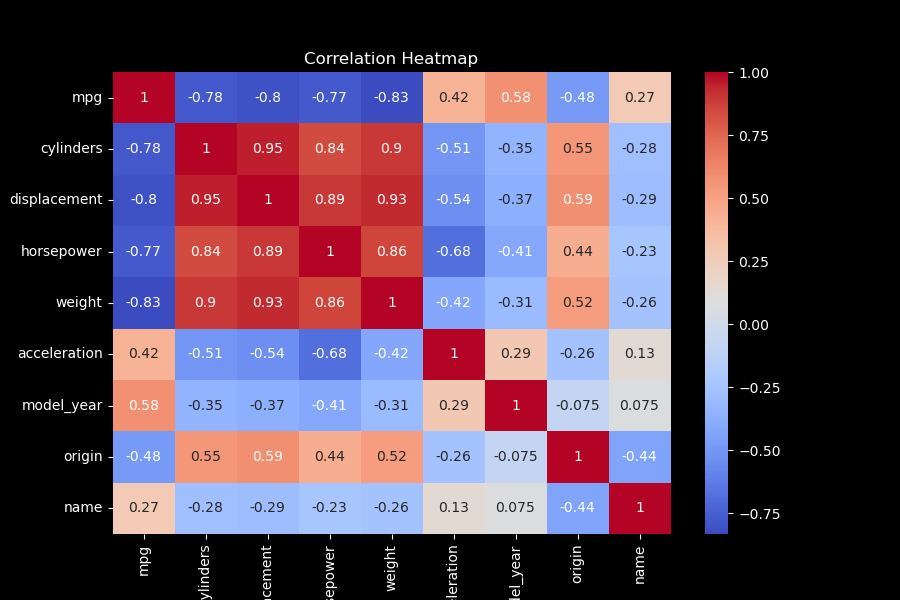

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Other approaches include:
- Recursive Feature Elimination (RFE) eliminates the least important features 
- Feature importance: algorithms like Decision Trees and Random Forests can provide a feature importance measurement
- SelectKBest: Scikit-learn provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features, like chi2, f_classif, mutual_info_classif (for classification) and f_regression, mutual_info_regression (for regression).